In [1]:
import pandas as pd

In [2]:
credit_df = pd.read_csv('German Credit Data.csv')
credit_df[0:5]

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [3]:
X = credit_df.drop('status', axis=1)
X = pd.get_dummies(X)
y = credit_df['status']
X

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A11,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A141,inst_plans_A142,inst_plans_A143,job_A171,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,48,5951,2,2,22,1,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,12,2096,2,3,49,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
3,42,7882,2,4,45,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5,36,9055,2,4,35,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
6,24,2835,3,4,53,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
7,36,6948,2,2,35,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
8,12,3059,2,4,61,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
9,30,5234,4,2,28,2,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)
clf_tree = DecisionTreeClassifier(criterion='gini')
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import image
export_graphviz(clf_tree)

ModuleNotFoundError: No module named 'pydotplus'

In [8]:
predictions = clf_tree.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
cm = confusion_matrix(y_test, predictions)
cm

array([[439, 112],
       [145, 104]])

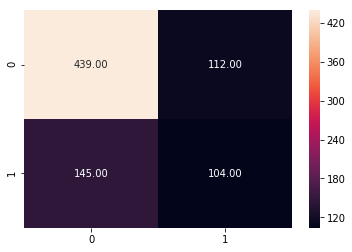

In [14]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(cm, annot=True, fmt='.2f')
plt.show()

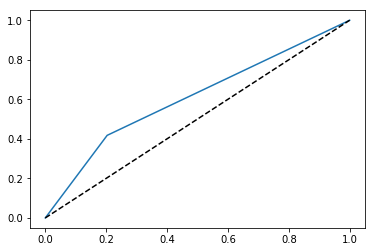

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc_score = roc_auc_score(y_test, predictions)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')